## 0 Read in data and NLTK Basics

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

plt.style.use('ggplot')

import nltk

In [4]:
# reading data
# df = pd.read_csv('Dataset\Reviews.csv')

# df = df.head(500)

# dataset = load_dataset("tweet_eval", "sentiment")
dataset = load_dataset("amazon_us_reviews","Camera_v1_00")
df = pd.DataFrame(dataset['train']).head(500)

df

Found cached dataset amazon_us_reviews (C:/Users/Splute/.cache/huggingface/datasets/amazon_us_reviews/Camera_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


  0%|          | 0/1 [00:00<?, ?it/s]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,US,3817265,R99R8WCERJULL,B00NW31YSE,705677192,Canary All-in-One Home Security Device,Camera,4,3,3,0,1,Should have some more views and 2-3 days to ch...,Should have some more views and 2-3 days to ch...,2015-08-31
496,US,45595220,R1P4L1QXJLXHQW,B00F5JV4NS,129493899,FotoTech ML-L3 Wireless Shutter Release Remote...,Camera,5,0,0,0,1,Five Stars,Works as described.,2015-08-31
497,US,121175,R20XEM5K76M9YR,B00YIXG9EG,11160417,KingCool WiFi 12MP Full HD 1080P DVR Camcorder...,Camera,5,0,1,0,1,Five Stars,Great little camera. Comes in handy when hooki...,2015-08-31
498,US,46244743,R39VQ7G7W7E7KA,B003LZ5SM6,761331780,Opteka LP-E8 2000mAh Ultra High Capacity Li-io...,Camera,3,0,0,0,1,Three Stars,It's good enough to give the original battery ...,2015-08-31


In [15]:
# 添加一个新的整数索引，并将其保存为'id'列
df['id'] = df.reset_index(drop=True).index
# 将'id'列移动到最左边
id_column = df['id']  # 获取'id'列
df.drop(columns=['id'], inplace=True)  # 删除'id'列
df.insert(0, 'id', id_column)  # 将'id'列插入到第一列

df

,id,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,3817265,R99R8WCERJULL,B00NW31YSE,705677192,Canary All-in-One Home Security Device,Camera,4,3,3,0,1,Should have some more views and 2-3 days to ch...,Should have some more views and 2-3 days to ch...,2015-08-31
496,496,45595220,R1P4L1QXJLXHQW,B00F5JV4NS,129493899,FotoTech ML-L3 Wireless Shutter Release Remote...,Camera,5,0,0,0,1,Five Stars,Works as described.,2015-08-31
497,497,121175,R20XEM5K76M9YR,B00YIXG9EG,11160417,KingCool WiFi 12MP Full HD 1080P DVR Camcorder...,Camera,5,0,1,0,1,Five Stars,Great little camera. Comes in handy when hooki...,2015-08-31
498,498,46244743,R39VQ7G7W7E7KA,B003LZ5SM6,761331780,Opteka LP-E8 2000mAh Ultra High Capacity Li-io...,Camera,3,0,0,0,1,Three Stars,It's good enough to give the original battery ...,2015-08-31


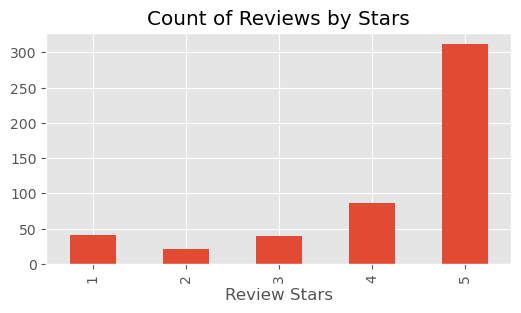

In [5]:
ax = df['star_rating'].value_counts().sort_index() \
    .plot(kind='bar',
        title='Count of Reviews by Stars',
        figsize=(6,3))

ax.set_xlabel('Review Stars')
plt.show()

## 1 VADER
each word is scored and combined to a total score

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm ## to add progress bars to loops and iterations

sia = SentimentIntensityAnalyzer()

In [16]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.373, 'pos': 0.627, 'compound': 0.7213}

In [16]:
# run on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='left')

In [19]:
vaders.head()

,id,neg,neu,pos,compound,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,0.000,0.000,1.000,0.2960,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,0.000,0.389,0.611,0.7424,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,0.027,0.908,0.065,0.8501,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,0.053,0.798,0.149,0.8033,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,0.025,0.739,0.237,0.9298,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31


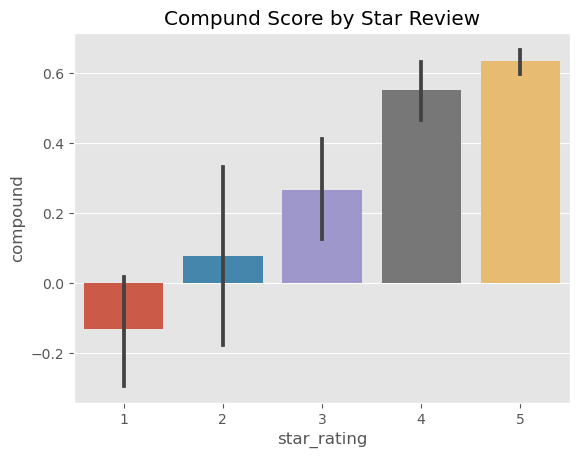

In [22]:
## plot vader results
ax = sns.barplot(data=vaders, x='star_rating', y = 'compound')
ax.set_title('Compund Score by Star Review')
plt.show()

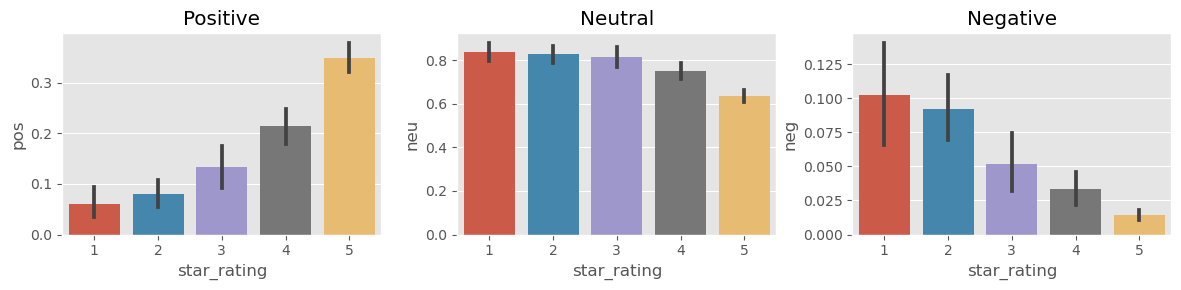

In [23]:
fig, axs = plt.subplots(1, 3, figsize = (12,3))
sns.barplot(data=vaders, x='star_rating', y = 'pos', ax=axs[0])
sns.barplot(data=vaders, x='star_rating', y = 'neu', ax=axs[1])
sns.barplot(data=vaders, x='star_rating', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta pretrained Model

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [27]:
example = 'How would you feel, if I... if I gave you your copy in person?'

In [36]:
#for VADER
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [28]:
# for roBerta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.14380644, 'roberta_neu': 0.6762827, 'roberta_pos': 0.17991084}


In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

    return scores_dict

In [31]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review_body']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}

        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 6
Broke for id 53
Broke for id 181
Broke for id 254
Broke for id 265
Broke for id 290
Broke for id 301
Broke for id 484
Broke for id 492


In [32]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'id'})
result_df = result_df.merge(df, how='left')

In [33]:
result_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,customer_id,review_id,...,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,0.000,0.000,1.000,0.2960,0.300267,0.426239,0.273494,2975964,R1NBG94582SJE2,...,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,0.000,0.389,0.611,0.7424,0.038502,0.092314,0.869183,23526356,R273DCA6Y0H9V7,...,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,0.027,0.908,0.065,0.8501,0.371169,0.417948,0.210883,52764145,RQVOXO7WUOFK6,...,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,0.053,0.798,0.149,0.8033,0.079245,0.207170,0.713585,47348933,R1KWKSF21PO6HO,...,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,0.025,0.739,0.237,0.9298,0.099418,0.112864,0.787718,33680700,R38H3UO1J190GI,...,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31


## 3 Compare Scores between Models

In [34]:
result_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'customer_id', 'review_id',
       'product_id', 'product_parent', 'product_title', 'product_category',
       'star_rating', 'helpful_votes', 'total_votes', 'vine',
       'verified_purchase', 'review_headline', 'review_body', 'review_date'],
      dtype='object')

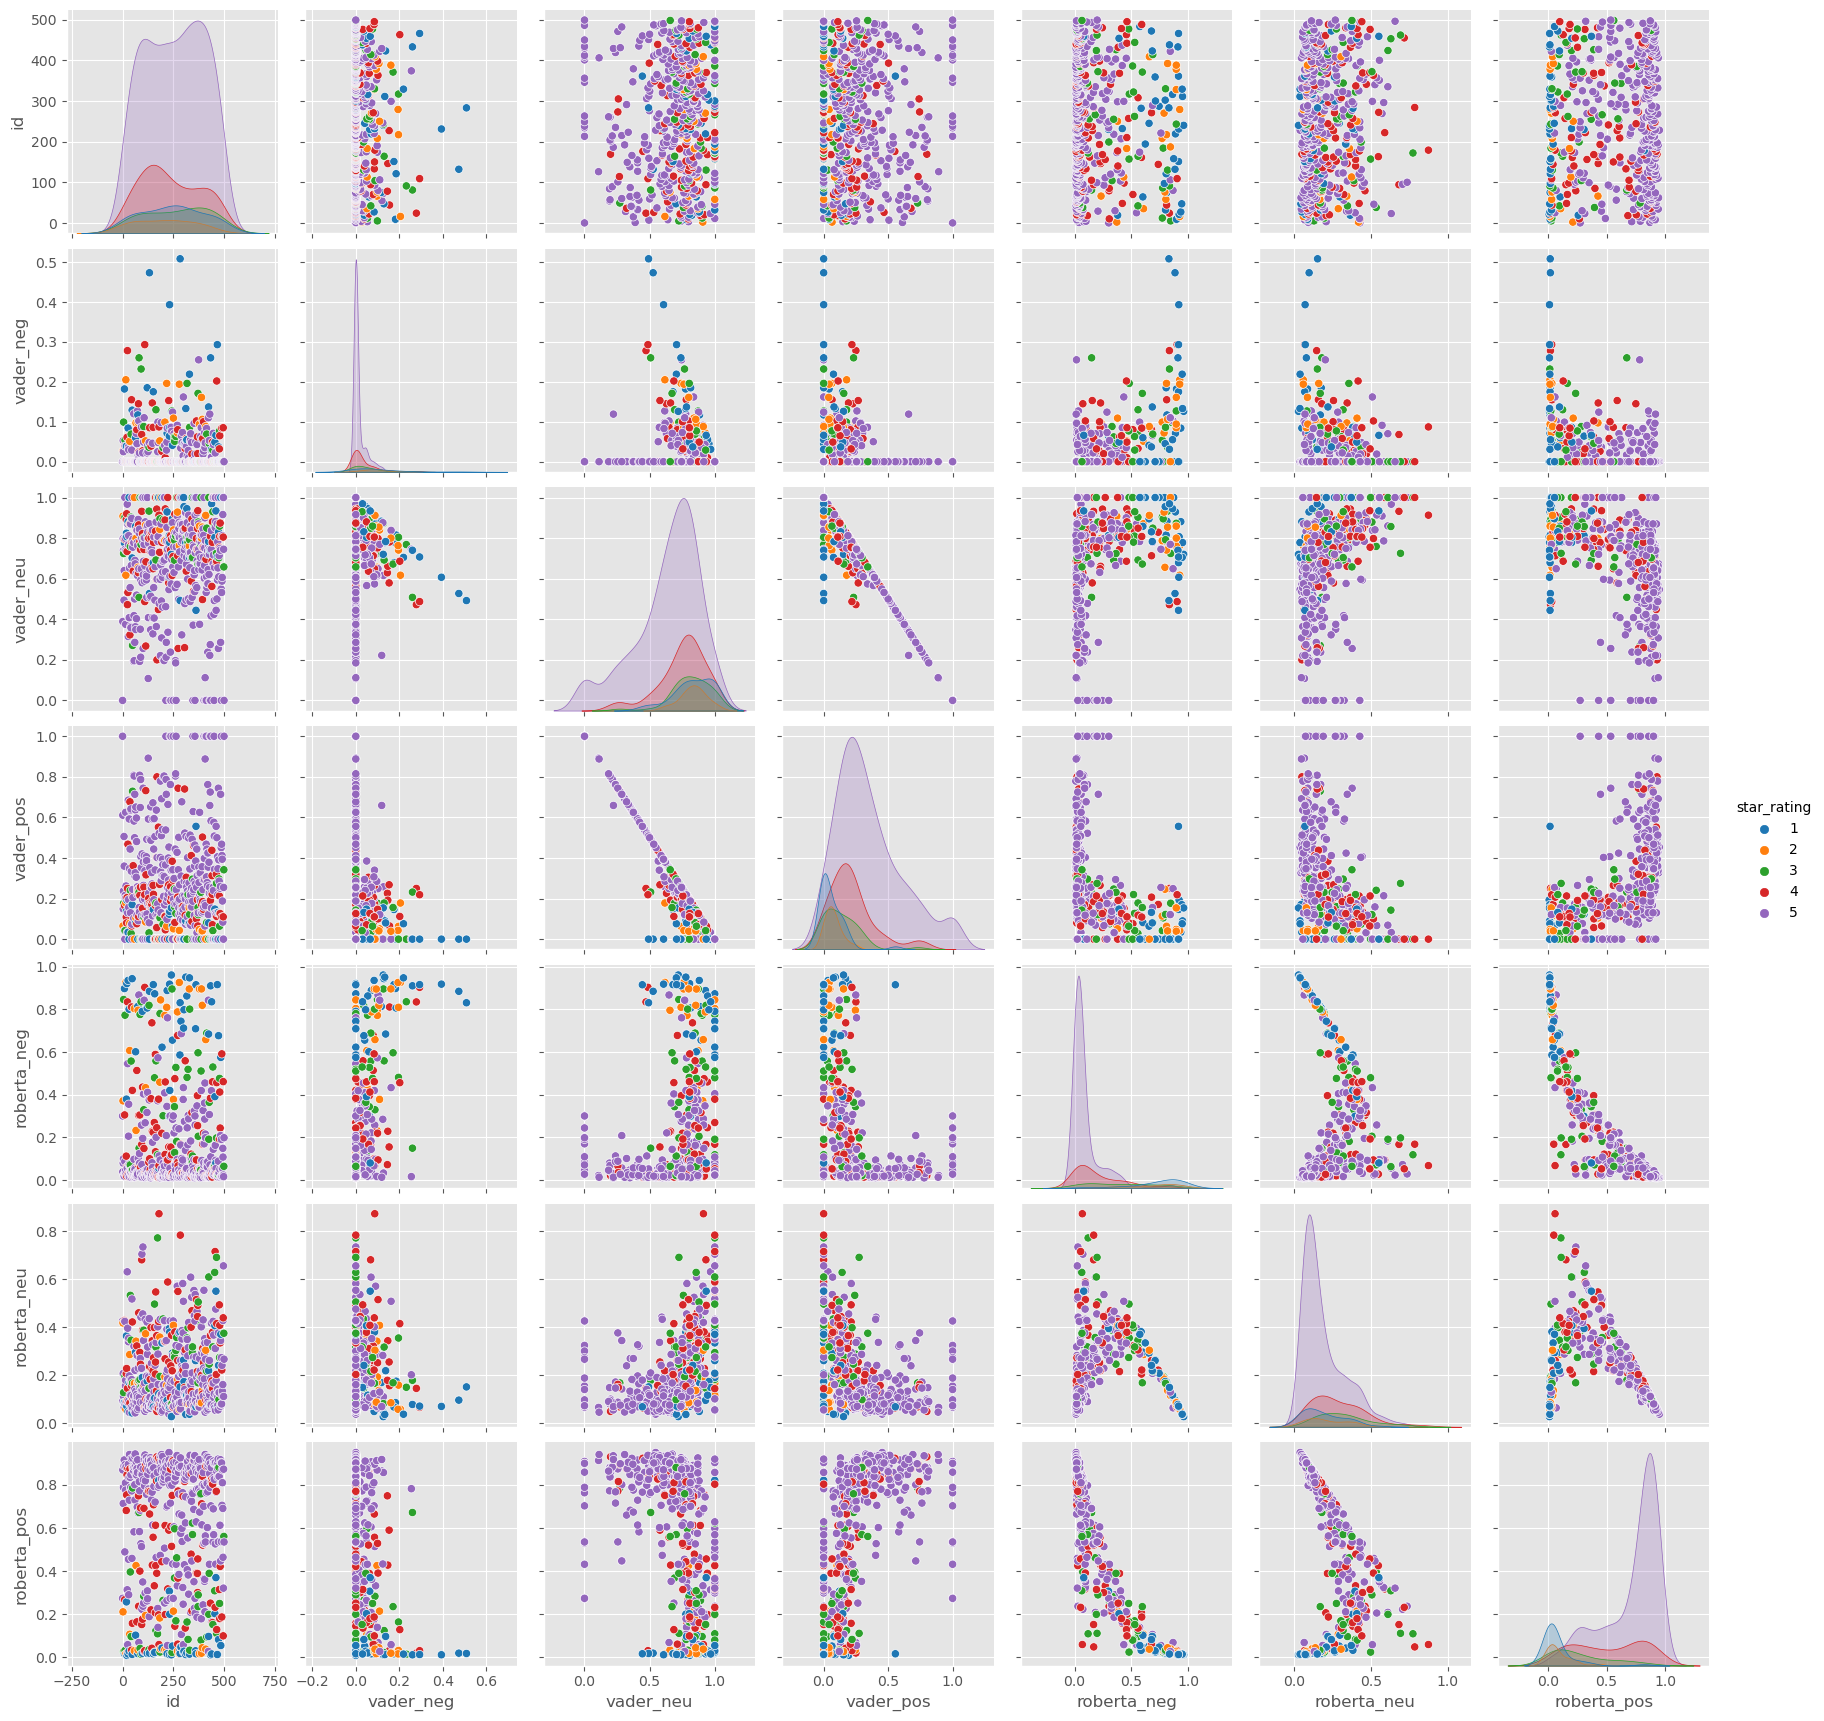

In [38]:
sns.pairplot(data = result_df, 
            vars=['id', 'vader_neg', 'vader_neu', 'vader_pos',
                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue = 'star_rating',
            palette = 'tab10')

plt.show()

## Extra: the pipline

In [57]:
from transformers import pipeline

sent_pipline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [58]:
eg = 'how would you feel if you will never see me?'
sent_pipline(eg)

[{'label': 'NEGATIVE', 'score': 0.9986938834190369}]

## The End